<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Monte Carlo - introduction with examples



# What is Monte Carlo simulation?
<hr style = "border:2px solid black" ></hr>


- **Origin**: It was invented by John von Neumann, Stanisław Ulam, and Nicholas Metropolis, who were employed on a secret assignment in the Los Alamos National Laboratory, while working on a nuclear weapon project called the Manhattan Project. It was named after a well-known casino town called Monaco, since chance and randomness are core to the modeling approach, similar to a game of roulette.

- **What does it do?** A Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. 
    
- **Where is it used?** It is used to understand the impact of risk and uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

- **The link with stochastics modelling** We generally have two strategies to chose from: we have data  and we can do supervised learning or we do not. In the latter case, we could use random variables (stochastic modelling) which forecasts the probability of various outcomes under different conditions (your inputs). MCS is one example of stochastic model.
    
- **Why not using DoE?** One approach that can produce a better understanding of the range of potential outcomes and help avoid the “flaw of averages” is a Monte Carlo simulation. In a DoE experiment you do not get the probability of the events you are studying.
    
- **Further** It can be used to simulate risk and uncertainty that can affect the outcome of different decision options. If there are *too many* variables affecting the outcome, then it can simulate them and find the optimal based on the values. MCS are used to model the probability of different outcomes in a process that cannot easily be predicted *due to* the intervention of random variables. It is a technique used to understand *the impact of* risk and uncertainty in prediction and forecasting models.



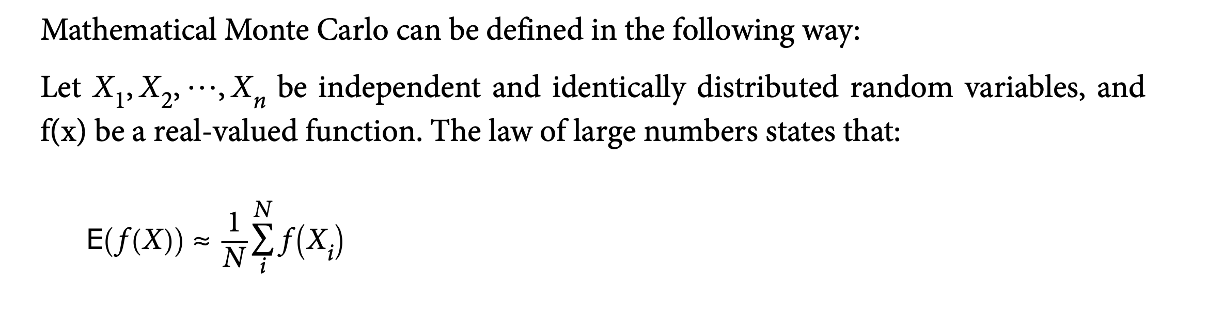


- So in a nutshell, a Monte Carlo simulation is doing nothing but generating random samples and calculating their mean. Computationally, it follows these steps:
    1. Define the domain
    2. Generate random numbers
    3. Iterate and aggregate the result



# Quasi-random variable
<hr style = "border:2px solid black" ></hr>


- Recall that the convergence of Monte Carlo integration is O(n^1/2). It turns out that if we use quasi-random or low discrepancy sequences (which fill space more efficiently than random sequences), we can get convergence approaching O(1/n). 

- There are several such generators, but their use in statistical settings is limited to cases where we are intergrating with respect to uniform distributions. The regularity can also give rise to errors when estimating integrals of periodic functions.



# Imports
<hr style = "border:2px solid black" ></hr>

In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, integrate, exp
import ghalton
from scipy import stats
from sympy import sin, cos, symbols, integrate

# Example #1 - Coin flip
<hr style = "border:2px solid black" ></hr>


- **Math PoV** The probability of head for a fair coin is 1/2. 
- **MC PoV** Can prove it experimentally? In this example, we are going to use the Monte-Carlo method to simulate the coin-flipping iteratively 5000 times to find out why the probability of a head or tail is always 1/2. If we repeat this coin flipping many, many more times, then we can achieve higher accuracy on an exact answer for our probability value. 
- **Conclusion** This is how we can use the Monte Carlo Simulation to find probabilities experimentally.



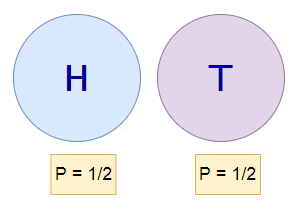

Final value : 0.5002


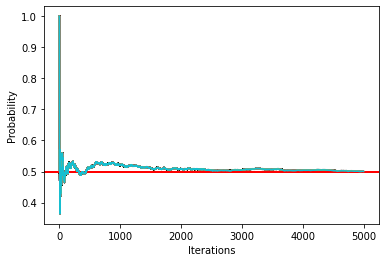

In [2]:
# 0 --> Heads
# 1 --> Tails

def coin_flip():
    """Coin flip
    Randomly select a value between 0 and 1
    """
    return random.randint(0, 1)


# Empty list to store the probability values.
list1 = []


def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results += flip_result

        # Calculating probability value :
        prob_value = results/(i+1)

        # Append the probability values to the list :
        list1.append(prob_value)

        # Plot the results :
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)

    return results/n


answer = monte_carlo(5000)
print("Final value :", answer)

# Example #2 - Estimating PI
<hr style = "border:2px solid black" ></hr>


- To estimate the value of PI, we need the area of the square and the area of the circle. 
    
- To find these areas, we will randomly place dots on the surface and count the dots that fall inside the circle and dots that fall inside the square. 
    
- Such will give us an estimated amount of their areas. 

- Therefore instead of using the actual areas, we will use the count of dots to use as areas.



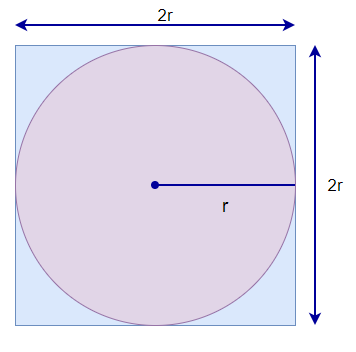

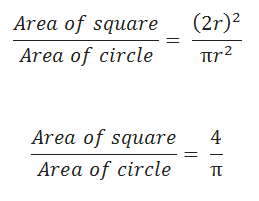 

Round No: 1
3.216
Round No: 2
3.186
Round No: 3
3.196
Round No: 4
3.183
Round No: 5
3.1776


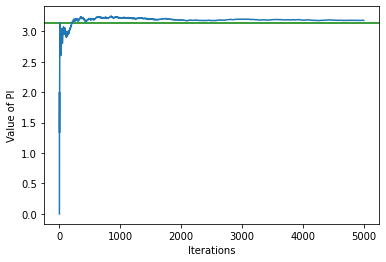

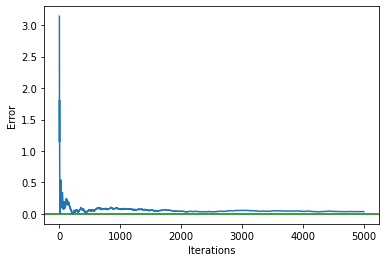

In [3]:
# To count the points inside and outside the circle :
in_circle = 0
out_circle = 0

# To store the values of PI :
pi_values = []

# Running for 5 times :
for i in range(5):
    print("Round No:", i+1)
    for j in range(1000):

        # Generate random numbers :
        x = random.randrange(-100, 100)
        y = random.randrange(-100, 100)

        # Check if the number lies outside the circle :
        if (x**2+y**2 > 100**2):
            out_circle = out_circle+1

        else:
            in_circle = in_circle+1

        # Calculating the value of PI :
        pi = 4.0 * in_circle / (in_circle + out_circle)

        # Append the values of PI in list :
        pi_values.append(pi)

        # Calculating the errors :
        avg_pi_errors = [abs(math.pi - pi) for pi in pi_values]

    # Print the final value of PI for each iterations :
    print(pi_values[-1])

# Plot the PI values :
plt.axhline(y=math.pi, color='g', linestyle='-')
plt.plot(pi_values)
plt.xlabel("Iterations")
plt.ylabel("Value of PI")
plt.show()

# Plot the error in calculation :
plt.axhline(y=0.0, color='g', linestyle='-')
plt.plot(avg_pi_errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

# Integration
<hr style = "border:2px solid black" ></hr>


- The convergence of Monte Carlo integration is 0(n^1/2) and independent of the dimensionality. 
- Hence Monte Carlo integration gnereally beats numerical intergration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as 0(n^d). 
- Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.



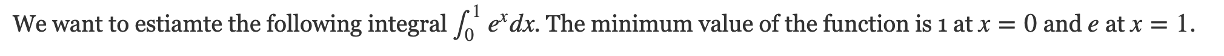

(0.0, 2.718281828459045)

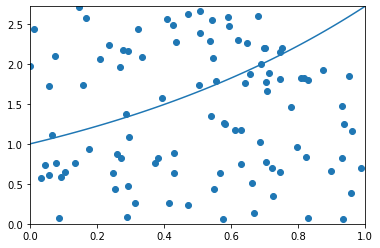

In [3]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x))
pts = np.random.uniform(0, 1, (100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([0, 1])
plt.ylim([0, np.e])

In [6]:
# Check analytic solution
x = symbols('x')
expr = integrate(exp(x), (x, 0, 1))
expr.evalf()

1.71828182845905

In [7]:
# Using numerical quadrature
# You may recall elementary versions such as the
# trapezoidal and Simpson's rules
# Note that nuerical quadrature needs $n^p$ grid points
# in $p$ dimensions to maintain the same accuracy
# This is known as the curse of dimensionality and explains
# why quadrature is not used for high-dimensional integration

from scipy import integrate
integrate.quad(exp, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)

In [9]:
# Monte Carlo approximation

for n in 10**np.array([1, 2, 3, 4, 5, 6, 7, 8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1  # volume of region
    sol = (volume * count)/n
    print('%10d %.6f' % (n, sol))

        10 2.174625
       100 1.739700
      1000 1.747855
     10000 1.708440
    100000 1.712164
   1000000 1.718740
  10000000 1.718175
 100000000 1.718336


# Montioring variance
<hr style = "border:2px solid black" ></hr>


- We are often interested in knowning how many iterations it takes for Monte Carlo integration to “converge”. 
    
- To do this, we would like some estimate of the variance, and it is useful to inspect such plots. 
    
- One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of interations is simply to do many such simulations.
    


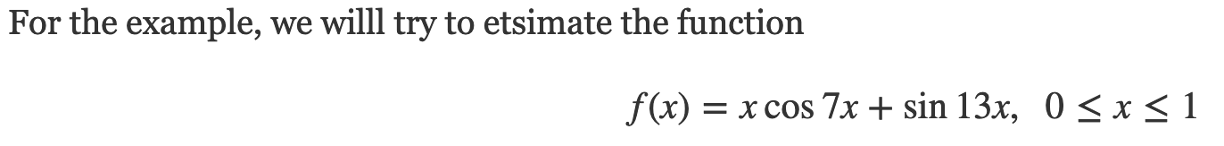

In [10]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

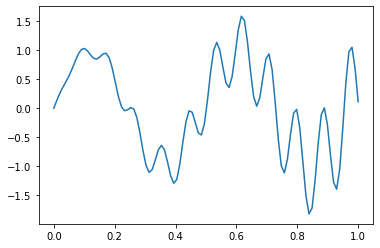

In [15]:

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))

In [16]:
# exact solution
x = symbols('x')
integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(6)

0.0202549

In [18]:
# Using multiple independent sequences¶

n = 100
reps = 1000

In [19]:
x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

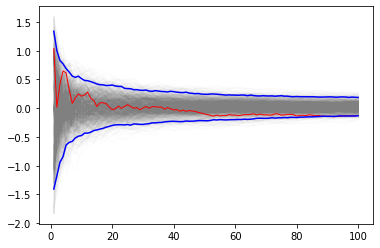

In [20]:
plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

In [23]:
# Using bootstrap¶
xb = np.random.choice(x[:,0], (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

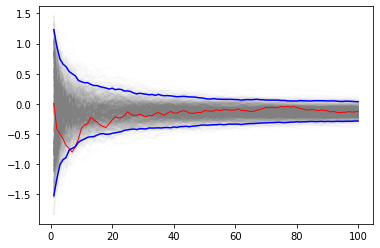

In [24]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

# Monte Carlo swindles (Variance reduction techniques)¶
<hr style = "border:2px solid black" ></hr>


- There are several general techiques for variance reduction, someitmes known as Monte Carlo swindles since these metthods improve the accuracy and convergene rate of Monte Carlo integration without increasing the number of Monte Carlo samples. 

- Some Monte Carlo swindles are:
    - importance sampling
    - stratified sampling
    - control variates
    - antithetic variates
    - conditioning swindles including Rao-Blackwellization and independent variance decomposition



In [28]:
gen2 = ghalton.Halton(2)

Text(0.5, 1.0, 'Quasi-random')

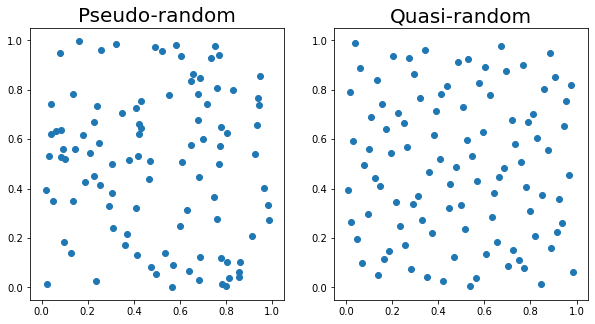

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(121)
xs = np.random.random((100,2))
plt.scatter(xs[:, 0], xs[:,1])
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.title('Pseudo-random', fontsize=20)
plt.subplot(122)
ys = np.array(gen2.get(100))
plt.scatter(ys[:, 0], ys[:,1])
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.title('Quasi-random', fontsize=20)

# References
<hr style = "border:2px solid black" ></hr>


- [blog](https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8)
- [GitHub code #1](https://github.com/towardsai/tutorials/tree/master/monte_carlo_simulation)
- [GitHub code #2](https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html)
- https://medium.com/@juee_thete/understanding-monte-carlo-simulation-and-its-implementation-with--python-3ecacb958cd4
- https://www.analyticsvidhya.com/blog/2021/07/a-guide-to-monte-carlo-simulation/
- https://www.kdnuggets.com/2020/12/monte-carlo-integration-python.html
- https://pbpython.com/monte-carlo.html
- https://hbr.org/2002/11/the-flaw-of-averages
- https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a
- [How to vectorise your MCS](http://hplgit.github.io/teamods/MC_cython/main_MC_cython-solarized.html)   
- https://github.com/abdullahkarasan/mlfrm/blob/main/codes/chp_5.ipynb
- Machine Learning for Financial Risk Management with Python Abdullah Karasan
   
